Notebook created: 2018-05-23 03:37:55  
Generated from: _build_jl/jl/linear_algebra.rst  

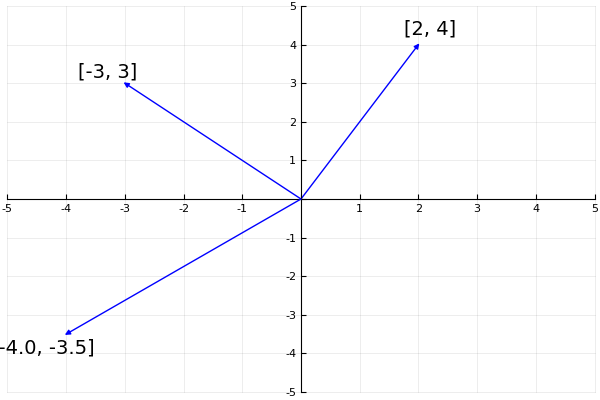

In [1]:
#=

@author : Spencer Lyon <spencer.lyon@nyu.edu>
          Victoria Gregory <victoria.gregory@nyu.edu>

=#

using Plots
pyplot()
using LaTeXStrings

vecs = ([2, 4], [-3, 3], [-4, -3.5])
x_vals = zeros(2, length(vecs))
y_vals = zeros(2, length(vecs))
labels = []

# Create matrices of x and y values, labels for plotting
for i = 1:length(vecs)
  v = vecs[i]
  x_vals[2, i] = v[1]
  y_vals[2, i] = v[2]
  labels = [labels; (1.1 * v[1], 1.1 * v[2], "$v")]
end

plot(x_vals, y_vals, arrow=true, color=:blue,
     legend=:none, xlims=(-5, 5), ylims=(-5, 5),
     annotations=labels, xticks=-5:1:5, yticks=-5:1:5,
     framestyle=:origin)

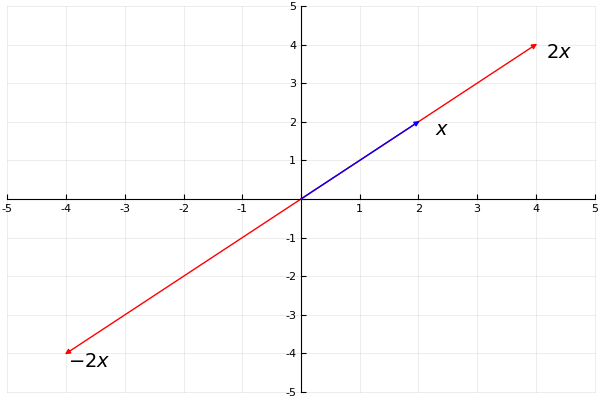

In [8]:
# illustrate scalar multiplication

x = [2, 2]
scalars = [-2, 2]

# Create matrices of x and y values, labels for plotting
x_vals = zeros(2, 1 + length(scalars))
y_vals = zeros(2, 1 + length(scalars))
labels = []
x_vals[2, 3] = x[1]
y_vals[2, 3] = x[2]
labels = [labels; (x[1] + 0.4, x[2] - 0.2, L"$x$")]

# Perform scalar multiplication, store results in plotting matrices
for i = 1:length(scalars)
  s = scalars[i]
  v = s .* x
  x_vals[2, i] = v[1]
  y_vals[2, i] = v[2]
  labels = [labels; (v[1] + 0.4, v[2] - 0.2, LaTeXString("\$$s x\$"))]
end

plot(x_vals, y_vals, arrow=true, color=[:red :red :blue],
     legend=:none, xlims=(-5, 5), ylims=(-5, 5),
     annotations=labels, xticks=-5:1:5, yticks=-5:1:5,
     framestyle=:origin)

In [12]:
x = ones(3)

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

```none
3-element Array{Float64,1}:
 1.0
 1.0
 1.0
```


In [ ]:
y = [2, 4, 6]

```none
3-element Array{Int64,1}:
 2
 4
 6
```


In [ ]:
x + y

```none
3-element Array{Float64,1}:
 3.0
 5.0
 7.0
```


In [ ]:
4x  # equivalent to 4 * x and 4 .* x

```none
3-element Array{Float64,1}:
 4.0
 4.0
 4.0
```


In [ ]:
dot(x, y)               # Inner product of x and y

```none
12.0
```


In [ ]:
sum(x .* y)             # Gives the same result

```none
12.0
```


In [ ]:
norm(x)                 # Norm of x

```none
1.7320508075688772
```


In [ ]:
sqrt(sum(x.^2))         # Gives the same result

```none
1.7320508075688772
```


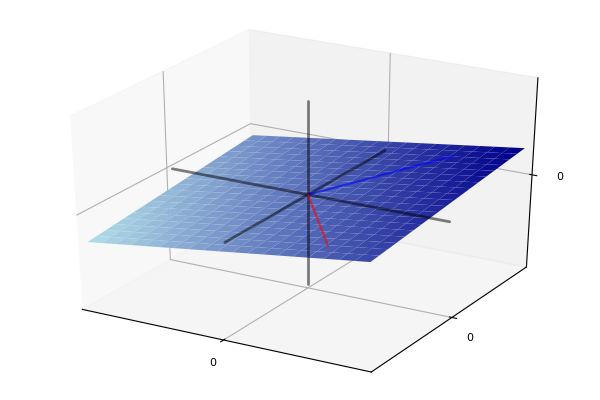

In [13]:
x_min, x_max = -5, 5
y_min, y_max = -5, 5

α, β = 0.2, 0.1

# Axes
gs = 3
z = linspace(x_min, x_max, gs)
x = zeros(gs)
y = zeros(gs)
plot(x, y, z, color=:black, linewidth=2, alpha=0.5, label="", legend=false)
plot!(z, x, y, color=:black, linewidth=2, alpha=0.5, label="")
plot!(y, z, x, color=:black, linewidth=2, alpha=0.5, label="")

# Fixed linear function, to generate a plane
f(x, y) = α .* x + β .* y

# Vector locations, by coordinate
x_coords = [3, 3]
y_coords = [4, -4]
z = f(x_coords, y_coords)

# Lines to vectors
n = 2
x_vec = zeros(n, n)
y_vec = zeros(n, n)
z_vec = zeros(n, n)
labels = []

for i=1:n
  x_vec[:, i] = [0; x_coords[i]]
  y_vec[:, i] = [0; y_coords[i]]
  z_vec[:, i] = [0; f(x_coords[i], y_coords[i])]
  lab = string("a", i)
  push!(labels, lab)
end

plot!(x_vec, y_vec, z_vec, color=[:blue :red], linewidth=1.5,
      alpha=0.6, label=labels)

# Draw the plane
grid_size = 20
xr2 = linspace(x_min, x_max, grid_size)
yr2 = linspace(y_min, y_max, grid_size)
z2 = Array{Float64}(grid_size, grid_size)
for i in 1:grid_size
    for j in 1:grid_size
        z2[j, i] = f(xr2[i], yr2[j])
    end
end
surface!(xr2, yr2, z2, cbar=false, alpha=0.2, fill=:blues,
         xlims=(x_min, x_max), ylims=(x_min, x_max),
         zlims=(x_min, x_max), xticks=[0], yticks=[0],
         zticks=[0])

In [ ]:
A = [1 2
     3 4]

```none
2×2 Array{Int64,2}:
 1  2
 3  4
```


In [ ]:
typeof(A)

```none
Array{Int64,2}
```


In [ ]:
size(A)

```none
(2,2)
```


In [ ]:
A = eye(3)

```none
3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0
```


In [ ]:
B = ones(3, 3)

```none
3×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
```


In [ ]:
2A

```none
3×3 Array{Float64,2}:
 2.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  2.0
```


In [ ]:
A + B

```none
3×3 Array{Float64,2}:
 2.0  1.0  1.0
 1.0  2.0  1.0
 1.0  1.0  2.0
```


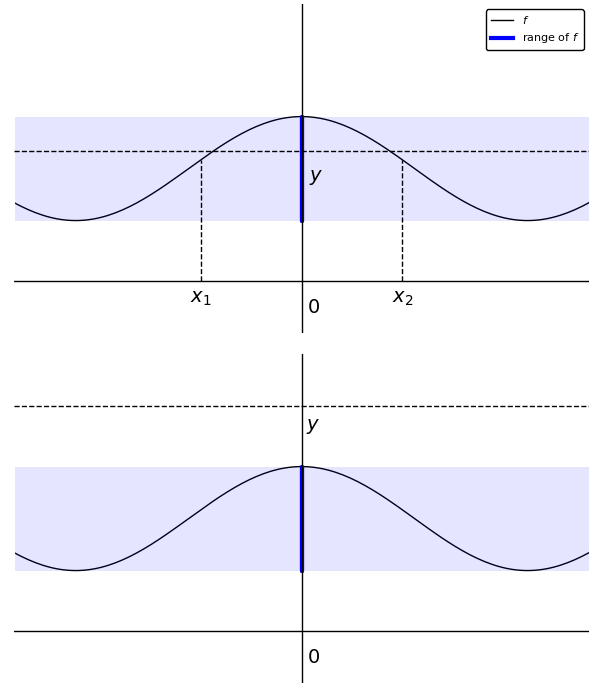

In [14]:
#=

@author : Spencer Lyon <spencer.lyon@nyu.edu>
          Victoria Gregory <victoria.gregory@nyu.edu>

=#


f(x) = 0.6 * cos(4.0 * x) + 1.3

xmin, xmax = -1.0, 1.0
Nx = 160
x = linspace(xmin, xmax, Nx)
y = f.(x)
ya, yb = minimum(y), maximum(y)

p1 = plot(x, y, color=:black, label=[L"$f$" ""], grid=false)
plot!(x, ya*ones(Nx, 1), fill_between=yb*ones(Nx, 1),
     fillalpha=0.1, color=:blue, label="", lw=0)
plot!(zeros(2, 2), [ya ya; yb yb], lw=3, color=:blue, label=[L"range of $f$" ""])
annotate!(0.04, -0.3, L"$0$", ylims=(-0.6, 3.2))
vline!([0], color=:black, label="")
hline!([0], color=:black, label="")
plot!(foreground_color_axis=:white, foreground_color_text=:white,
      foreground_color_border=:white)

ybar = 1.5
plot!(x, x .* 0 .+ ybar, color=:black, linestyle=:dash, label="")
annotate!(0.05, 0.8 * ybar, L"$y$")

x_vals = Array{Float64}(2, 4)
y_vals = Array{Float64}(2, 4)
labels = []
for (i, z) in enumerate([-0.35, 0.35])
  x_vals[:, 2*i-1] = z*ones(2, 1)
  y_vals[2, 2*i-1] = f(z)
  labels = [labels; (z, -0.2, LaTeXString("\$x_$i\$"))]
end
plot!(x_vals, y_vals, color=:black, linestyle=:dash, label="", annotation=labels)

p2 = plot(x, y, color=:black, label=[L"$f$" ""], grid=false)
plot!(x, ya*ones(Nx, 1), fill_between=yb*ones(Nx, 1),
     fillalpha=0.1, color=:blue, label="", lw=0)
plot!(zeros(2, 2), [ya ya; yb yb], lw=3, color=:blue, label=[L"range of $f$" ""])
annotate!(0.04, -0.3, L"$0$", ylims=(-0.6, 3.2))
vline!([0], color=:black, label="")
hline!([0], color=:black, label="")
plot!(foreground_color_axis=:white, foreground_color_text=:white,
      foreground_color_border=:white)

ybar = 2.6
plot!(x, x .* 0 .+ ybar, color=:black, linestyle=:dash, legend=:none)
annotate!(0.04, 0.91 * ybar, L"$y$")

plot(p1, p2, layout=(2, 1), size=(600, 700))

```jlcon

```


In [ ]:
A = [1.0 2.0; 3.0 4.0];

In [ ]:
y = ones(2, 1);  # A column vector

```none
2×1 Array{Float64,2}:
 1.0
 1.0
```


In [ ]:
det(A)

```none
-2.0
```


In [ ]:
A_inv = inv(A)

```none
2×2 Array{Float64,2}:
 -2.0   1.0
  1.5  -0.5
```


In [ ]:
x = A_inv * y  # solution

```none
2×1 Array{Float64,2}:
 -1.0
  1.0
```


In [ ]:
A * x  # should equal y (a vector of ones)

```none
2×1 Array{Float64,2}:
 1.0
 1.0
```


In [ ]:
A\y  # produces the same solution

```none
2×1 Array{Float64,2}:
 -1.0
  1.0
```


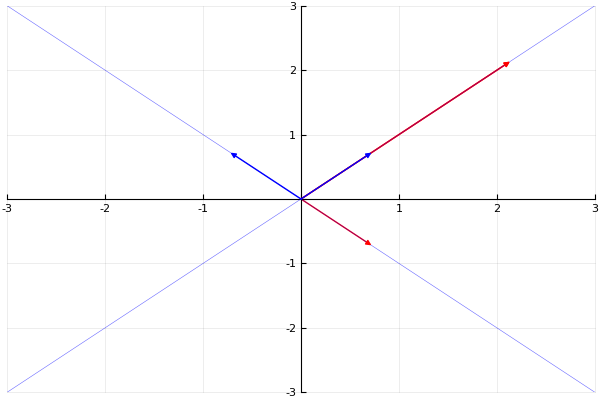

In [15]:
A = [1 2
     2 1]
evals, evecs = eig(A)
a1, a2 = evals[1], evals[2]
evecs = evecs[:, 1], evecs[:, 2]
eig_1 = zeros(2, length(evecs))
eig_2 = zeros(2, length(evecs))
labels = []

for i = 1:length(evecs)
  v = evecs[i]
  eig_1[2, i] = v[1]
  eig_2[2, i] = v[2]
end

x = linspace(-5, 5, 10)
y = -linspace(-5, 5, 10)

plot(eig_1[:, 2], a1 * eig_2[:, 2], arrow=true, color=:red,
     legend=:none, xlims=(-3, 3), ylims=(-3, 3),
     annotations=labels, xticks=-5:1:5, yticks=-5:1:5,
     framestyle=:origin)
plot!(a2 * eig_1[:, 2], a2 * eig_2, arrow=true, color=:red)
plot!(eig_1, eig_2, arrow=true, color=:blue)
plot!(x, y, color=:blue, lw=0.4, alpha=0.6)
plot!(x, x, color=:blue, lw=0.4, alpha=0.6)

In [ ]:
A = [1.0 2.0; 2.0 1.0];

In [ ]:
evals, evecs = eig(A);

In [ ]:
evals

```none
2-element Array{Float64,1}:
 -1.0
  3.0
```


In [ ]:
evecs

```none
2×2 Array{Float64,2}:
 -0.707107  0.707107
  0.707107  0.707107
```
